In [1]:
# Libraries

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import argmax
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import keras
from keras import layers
from keras import models
from keras.utils import to_categorical
from keras import losses, metrics, optimizers

Using TensorFlow backend.


In [2]:
#load the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [4]:
# Preprocessing data

train_labels = train["label"]
train_images = train.drop(labels = ["label"], axis = 1)
test_images = test

# reshape images for dense layers

train_images = train_images.values.reshape((train.shape[0], 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.values.reshape((test.shape[0], 28*28))
test_images = test_images.astype('float32') / 255


# train test split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, 
                                                                      train_labels, test_size = 0.1, random_state=2)


# one hot encode labels
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [5]:
# create a 1 hidden layer
model_1 = models.Sequential()
model_1.add(layers.Dense(32, activation = "relu", input_shape = (28*28,)))
model_1.add(layers.Dense(10, activation = "softmax"))
model_1.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [6]:
# optimizer RMS prop
model_1.compile(optimizer = "RMSprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [7]:
history = model_1.fit(train_images, train_labels, epochs=20, batch_size=200, validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 0s 12us/step - loss: 0.6326 - acc: 0.8366 - val_loss: 0.3356 - val_acc: 0.9076
Epoch 2/20
37800/37800 [==============================] - 0s 8us/step - loss: 0.2951 - acc: 0.9165 - val_loss: 0.2695 - val_acc: 0.9236
Epoch 3/20
37800/37800 [==============================] - 0s 8us/step - loss: 0.2461 - acc: 0.9304 - val_loss: 0.2437 - val_acc: 0.9319
Epoch 4/20
37800/37800 [==============================] - 0s 8us/step - loss: 0.2184 - acc: 0.9373 - val_loss: 0.2315 - val_acc: 0.9350
Epoch 5/20
37800/37800 [==============================] - 0s 9us/step - loss: 0.1997 - acc: 0.9432 - val_loss: 0.2101 - val_acc: 0.9410
Epoch 6/20
37800/37800 [==============================] - 0s 8us/step - loss: 0.1836 - acc: 0.9474 - val_loss: 0.2090 - val_acc: 0.9398
Epoch 7/20
37800/37800 [==============================] - 0s 8us/step - loss: 0.1699 -

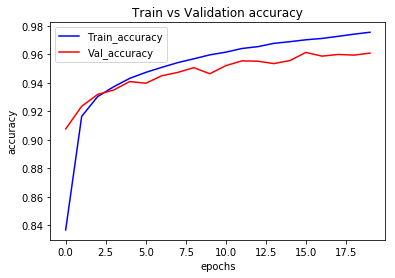

In [8]:
plt.plot(history.history["acc"], "b", label = "Train_accuracy")
plt.plot(history.history["val_acc"], "r", label = "Val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Train vs Validation accuracy")
plt.legend()
plt.show()

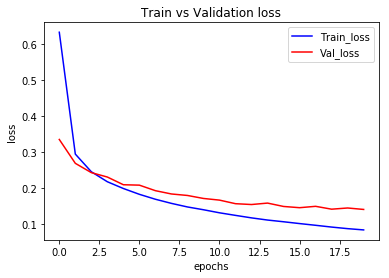

In [9]:
plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Train vs Validation loss")
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       411
           1       0.98      0.98      0.98       485
           2       0.95      0.97      0.96       403
           3       0.96      0.95      0.95       418
           4       0.98      0.95      0.96       461
           5       0.95      0.95      0.95       372
           6       0.97      0.96      0.97       413
           7       0.99      0.96      0.97       446
           8       0.95      0.93      0.94       382
           9       0.92      0.97      0.94       409

   micro avg       0.96      0.96      0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200

Accuracy score : 0.960952380952381


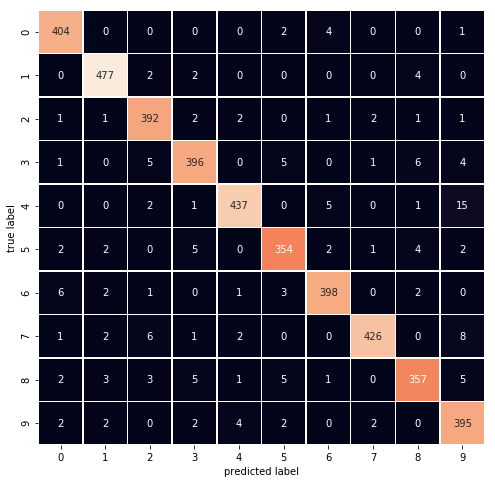

In [10]:
pred_val_cnn = model_1.predict_classes(val_images)
plot_confusion_matrix(argmax(val_labels,-1), pred_val_cnn)
print(classification_report(argmax(val_labels,-1), pred_val_cnn))
acc_cnn = accuracy_score(argmax(val_labels,-1), pred_val_cnn)
print("Accuracy score : {}".format(acc_cnn))

In [11]:
# create a 1 hidden layer
model_1_bis = models.Sequential()
model_1_bis.add(layers.Dense(32, activation = "relu", input_shape = (28*28,)))
model_1_bis.add(layers.Dense(10, activation = "softmax"))
model_1_bis.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [12]:
# optimizer Adam
model_1_bis.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [13]:
history = model_1_bis.fit(train_images, train_labels, epochs=20, batch_size=200, validation_data=(val_images, val_labels))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 0s 13us/step - loss: 0.7456 - acc: 0.8029 - val_loss: 0.3542 - val_acc: 0.9014
Epoch 2/20
37800/37800 [==============================] - 0s 9us/step - loss: 0.3147 - acc: 0.9122 - val_loss: 0.2837 - val_acc: 0.9198
Epoch 3/20
37800/37800 [==============================] - 0s 8us/step - loss: 0.2633 - acc: 0.9263 - val_loss: 0.2508 - val_acc: 0.9271
Epoch 4/20
37800/37800 [==============================] - 0s 10us/step - loss: 0.2324 - acc: 0.9347 - val_loss: 0.2318 - val_acc: 0.9367
Epoch 5/20
37800/37800 [==============================] - 0s 9us/step - loss: 0.2093 - acc: 0.9415 - val_loss: 0.2161 - val_acc: 0.9390
Epoch 6/20
37800/37800 [==============================] - 0s 8us/step - loss: 0.1903 - acc: 0.9463 - val_loss: 0.1987 - val_acc: 0.9431
Epoch 7/20
37800/37800 [==============================] - 0s 8us/step - loss: 0.1748 - acc: 0.9514 - val_loss: 0.1886 - val_acc: 0.94

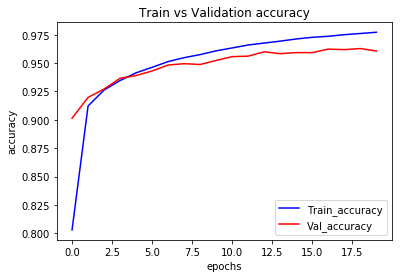

In [14]:
plt.plot(history.history["acc"], "b", label = "Train_accuracy")
plt.plot(history.history["val_acc"], "r", label = "Val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Train vs Validation accuracy")
plt.legend()
plt.show()

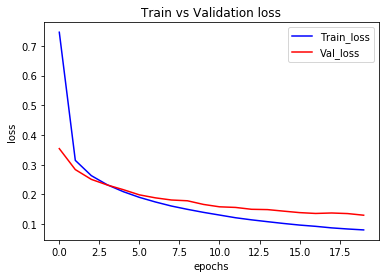

In [15]:
plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Train vs Validation loss")
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       411
           1       0.98      0.98      0.98       485
           2       0.95      0.97      0.96       403
           3       0.97      0.94      0.95       418
           4       0.96      0.95      0.96       461
           5       0.95      0.96      0.96       372
           6       0.97      0.97      0.97       413
           7       0.97      0.97      0.97       446
           8       0.96      0.92      0.94       382
           9       0.93      0.95      0.94       409

   micro avg       0.96      0.96      0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200

Accuracy score : 0.9607142857142857


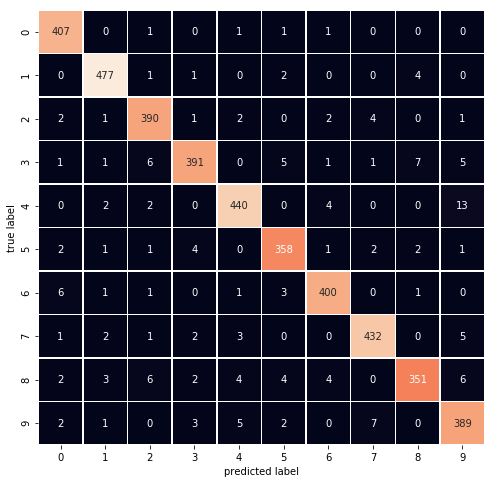

In [16]:
pred_val_cnn = model_1_bis.predict_classes(val_images)
plot_confusion_matrix(argmax(val_labels,-1), pred_val_cnn)
print(classification_report(argmax(val_labels,-1), pred_val_cnn))
acc_cnn = accuracy_score(argmax(val_labels,-1), pred_val_cnn)
print("Accuracy score : {}".format(acc_cnn))

In [17]:
# create 2 hidden layers
model_2 = models.Sequential()
model_2.add(layers.Dense(100, activation = "relu", input_shape = (28*28,)))
model_2.add(layers.Dense(200,activation="relu"))
model_2.add(layers.Dense(10, activation = "softmax"))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2010      
Total params: 100,710
Trainable params: 100,710
Non-trainable params: 0
_________________________________________________________________


In [18]:
# optimizer
model_2.compile(optimizer = "RMSprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [19]:
history = model_2.fit(train_images, train_labels, epochs=20, batch_size=200, validation_data=(val_images, val_labels))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 1s 21us/step - loss: 0.4204 - acc: 0.8793 - val_loss: 0.2263 - val_acc: 0.9343
Epoch 2/20
37800/37800 [==============================] - 1s 15us/step - loss: 0.1831 - acc: 0.9460 - val_loss: 0.1649 - val_acc: 0.9502
Epoch 3/20
37800/37800 [==============================] - 1s 14us/step - loss: 0.1263 - acc: 0.9626 - val_loss: 0.1404 - val_acc: 0.9590
Epoch 4/20
37800/37800 [==============================] - 1s 14us/step - loss: 0.0964 - acc: 0.9704 - val_loss: 0.1134 - val_acc: 0.9667
Epoch 5/20
37800/37800 [==============================] - 1s 14us/step - loss: 0.0749 - acc: 0.9775 - val_loss: 0.1078 - val_acc: 0.9676
Epoch 6/20
37800/37800 [==============================] - 1s 14us/step - loss: 0.0601 - acc: 0.9817 - val_loss: 0.0958 - val_acc: 0.9700
Epoch 7/20
37800/37800 [==============================] - 1s 14us/step - loss: 0.0502 - acc: 0.9846 - val_loss: 0.0997 - val_acc:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       411
           1       0.99      0.99      0.99       485
           2       0.98      0.97      0.98       403
           3       0.95      0.98      0.97       418
           4       0.98      0.98      0.98       461
           5       0.97      0.96      0.96       372
           6       0.98      0.97      0.98       413
           7       0.99      0.98      0.98       446
           8       0.94      0.96      0.95       382
           9       0.96      0.96      0.96       409

   micro avg       0.97      0.97      0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200

Accuracy score : 0.9738095238095238


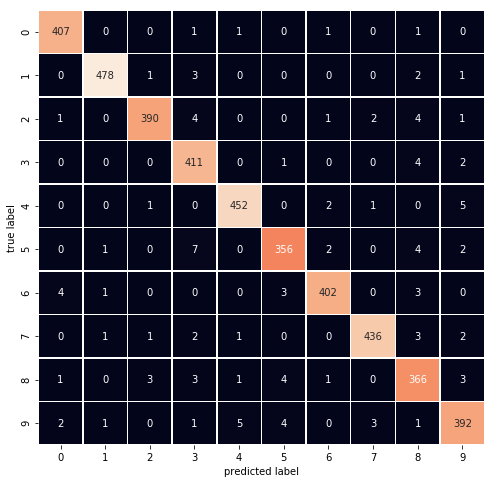

In [20]:
pred_val_cnn = model_2.predict_classes(val_images)
plot_confusion_matrix(argmax(val_labels,-1), pred_val_cnn)
print(classification_report(argmax(val_labels,-1), pred_val_cnn))
acc_cnn = accuracy_score(argmax(val_labels,-1), pred_val_cnn)
print("Accuracy score : {}".format(acc_cnn))

In [21]:
model_2.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [22]:
history = model_2.fit(train_images, train_labels, epochs=20, batch_size=200, validation_data=(val_images, val_labels))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 1s 24us/step - loss: 0.0089 - acc: 0.9969 - val_loss: 0.1473 - val_acc: 0.9707
Epoch 2/20
37800/37800 [==============================] - 1s 15us/step - loss: 0.0066 - acc: 0.9980 - val_loss: 0.1382 - val_acc: 0.9714
Epoch 3/20
37800/37800 [==============================] - 1s 15us/step - loss: 0.0054 - acc: 0.9984 - val_loss: 0.1331 - val_acc: 0.9750
Epoch 4/20
37800/37800 [==============================] - 1s 15us/step - loss: 0.0059 - acc: 0.9982 - val_loss: 0.1315 - val_acc: 0.9752
Epoch 5/20
37800/37800 [==============================] - 1s 15us/step - loss: 0.0092 - acc: 0.9969 - val_loss: 0.1836 - val_acc: 0.9671
Epoch 6/20
37800/37800 [==============================] - 1s 15us/step - loss: 0.0114 - acc: 0.9962 - val_loss: 0.1452 - val_acc: 0.9729
Epoch 7/20
37800/37800 [==============================] - 1s 18us/step - loss: 0.0026 - acc: 0.9993 - val_loss: 0.1264 - val_acc:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       411
           1       0.99      0.99      0.99       485
           2       0.99      0.98      0.98       403
           3       0.98      0.97      0.97       418
           4       0.98      0.98      0.98       461
           5       0.98      0.96      0.97       372
           6       0.98      0.98      0.98       413
           7       0.98      0.98      0.98       446
           8       0.94      0.97      0.96       382
           9       0.96      0.96      0.96       409

   micro avg       0.98      0.98      0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200

Accuracy score : 0.9771428571428571


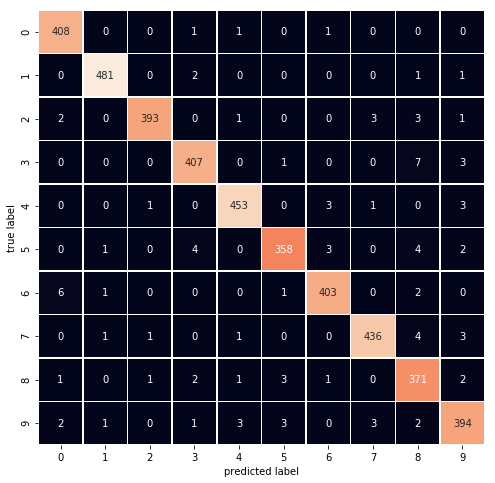

In [23]:
pred_val_cnn = model_2.predict_classes(val_images)
plot_confusion_matrix(argmax(val_labels,-1), pred_val_cnn)
print(classification_report(argmax(val_labels,-1), pred_val_cnn))
acc_cnn = accuracy_score(argmax(val_labels,-1), pred_val_cnn)
print("Accuracy score : {}".format(acc_cnn))

In [25]:
# create 3 hidden layers
model_3 = models.Sequential()
model_3.add(layers.Dense(100, activation = "relu", input_shape = (28*28,)))
model_3.add(layers.Dense(200,activation="relu"))
model_3.add(layers.Dense(100,activation="relu"))
model_3.add(layers.Dense(10, activation = "softmax"))
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 119,810
Trainable params: 119,810
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_3.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [30]:
history = model_3.fit(train_images, train_labels, epochs=20, batch_size=200, validation_data=(val_images, val_labels))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 1s 29us/step - loss: 0.0115 - acc: 0.9961 - val_loss: 0.1495 - val_acc: 0.9731
Epoch 2/20
37800/37800 [==============================] - 1s 18us/step - loss: 0.0101 - acc: 0.9967 - val_loss: 0.1361 - val_acc: 0.9764
Epoch 3/20
37800/37800 [==============================] - 1s 19us/step - loss: 0.0104 - acc: 0.9966 - val_loss: 0.1355 - val_acc: 0.9757
Epoch 4/20
37800/37800 [==============================] - 1s 18us/step - loss: 0.0090 - acc: 0.9973 - val_loss: 0.1402 - val_acc: 0.9750
Epoch 5/20
37800/37800 [==============================] - 1s 18us/step - loss: 0.0046 - acc: 0.9987 - val_loss: 0.1208 - val_acc: 0.9762
Epoch 6/20
37800/37800 [==============================] - 1s 20us/step - loss: 5.8066e-04 - acc: 0.9999 - val_loss: 0.1363 - val_acc: 0.9762
Epoch 7/20
37800/37800 [==============================] - 1s 19us/step - loss: 0.0063 - acc: 0.9987 - val_loss: 0.1591 - val_

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       411
           1       0.99      0.99      0.99       485
           2       0.97      0.98      0.98       403
           3       1.00      0.93      0.96       418
           4       0.98      0.98      0.98       461
           5       0.96      0.98      0.97       372
           6       0.98      0.98      0.98       413
           7       0.98      0.97      0.98       446
           8       0.93      0.97      0.95       382
           9       0.96      0.97      0.96       409

   micro avg       0.97      0.97      0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200

Accuracy score : 0.9745238095238096


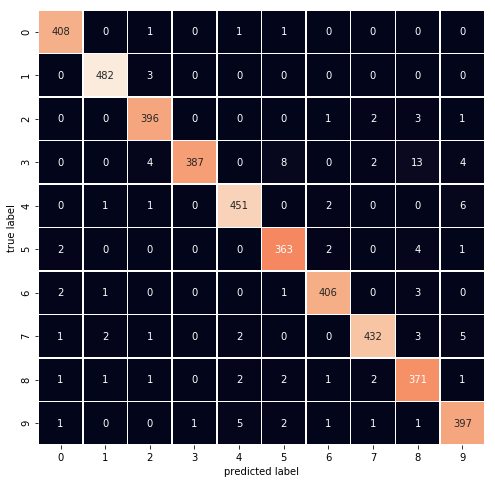

In [31]:
pred_val_cnn = model_3.predict_classes(val_images)
plot_confusion_matrix(argmax(val_labels,-1), pred_val_cnn)
print(classification_report(argmax(val_labels,-1), pred_val_cnn))
acc_cnn = accuracy_score(argmax(val_labels,-1), pred_val_cnn)
print("Accuracy score : {}".format(acc_cnn))

In [32]:
model_cnn = models.Sequential()

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
val_images = val_images.reshape((val_images.shape[0], 28, 28, 1))



model_cnn.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (28, 28, 1)))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Conv2D(64, (3,3), activation = "relu"))
model_cnn.add(layers.MaxPooling2D((2,2)))
# try with dropout
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(10, activation = "softmax"))

# try with other optimizer
model_cnn.compile(optimizer = "RMSprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# other epochs and batchsize
history = model_cnn.fit(train_images, train_labels, epochs=20, batch_size=200, validation_data=(val_images, val_labels))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 20s 533us/step - loss: 0.4141 - acc: 0.8816 - val_loss: 0.1513 - val_acc: 0.9536
Epoch 2/20
37800/37800 [==============================] - 20s 541us/step - loss: 0.1160 - acc: 0.9646 - val_loss: 0.0878 - val_acc: 0.9736
Epoch 3/20
37800/37800 [==============================] - 21s 550us/step - loss: 0.0776 - acc: 0.9755 - val_loss: 0.0691 - val_acc: 0.9767
Epoch 4/20
37800/37800 [==============================] - 21s 563us/step - loss: 0.0606 - acc: 0.9804 - val_loss: 0.0544 - val_acc: 0.9829
Epoch 5/20
37800/37800 [==============================] - 21s 555us/step - loss: 0.0489 - acc: 0.9852 - val_loss: 0.0449 - val_acc: 0.9871
Epoch 6/20
37800/37800 [==============================] - 21s 558us/step - loss: 0.0419 - acc: 0.9874 - val_loss: 0.0416 - val_acc: 0.9867
Epoch 7/20
37800/37800 [==============================] - 21s 562us/step - loss: 0.0363 - acc: 0.9887 - val_loss: 0.0

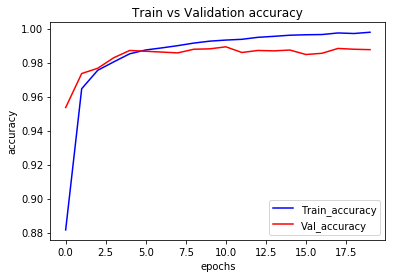

In [33]:
plt.plot(history.history["acc"], "b", label = "Train_accuracy")
plt.plot(history.history["val_acc"], "r", label = "Val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Train vs Validation accuracy")
plt.legend()
plt.show()

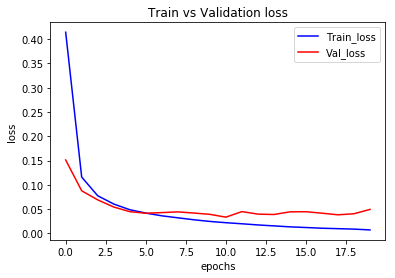

In [34]:
plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Train vs Validation loss")
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       411
           1       1.00      0.99      0.99       485
           2       0.99      0.99      0.99       403
           3       0.98      0.99      0.99       418
           4       0.98      0.99      0.99       461
           5       0.99      0.97      0.98       372
           6       0.99      0.98      0.99       413
           7       0.99      1.00      0.99       446
           8       0.96      0.99      0.98       382
           9       0.99      0.98      0.98       409

   micro avg       0.99      0.99      0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200

Accuracy score : 0.9876190476190476


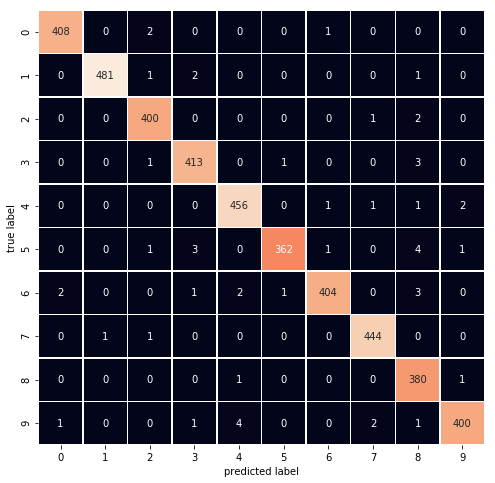

In [35]:
pred_val_cnn = model_cnn.predict_classes(val_images)
plot_confusion_matrix(argmax(val_labels,-1), pred_val_cnn)
print(classification_report(argmax(val_labels,-1), pred_val_cnn))
acc_cnn = accuracy_score(argmax(val_labels,-1), pred_val_cnn)
print("Accuracy score : {}".format(acc_cnn))

In [37]:
model_cnn_2 = models.Sequential()

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
val_images = val_images.reshape((val_images.shape[0], 28, 28, 1))



model_cnn_2.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (28, 28, 1)))
model_cnn_2.add(layers.MaxPooling2D((2,2)))
model_cnn_2.add(layers.Conv2D(64, (3,3), activation = "relu"))
model_cnn_2.add(layers.MaxPooling2D((2,2)))
# try with dropout
model_cnn_2.add(layers.Flatten())
model_cnn_2.add(layers.Dense(128,activation="relu"))
model_cnn_2.add(layers.Dense(10, activation = "softmax"))

# try with other optimizer
model_cnn_2.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# other epochs and batchsize
history = model_cnn_2.fit(train_images, train_labels, epochs=20, batch_size=200, validation_data=(val_images, val_labels))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 31s 819us/step - loss: 0.3452 - acc: 0.9034 - val_loss: 0.1127 - val_acc: 0.9631
Epoch 2/20
37800/37800 [==============================] - 30s 803us/step - loss: 0.0815 - acc: 0.9758 - val_loss: 0.0692 - val_acc: 0.9790
Epoch 3/20
37800/37800 [==============================] - 30s 787us/step - loss: 0.0538 - acc: 0.9834 - val_loss: 0.0491 - val_acc: 0.9843
Epoch 4/20
37800/37800 [==============================] - 30s 794us/step - loss: 0.0417 - acc: 0.9871 - val_loss: 0.0427 - val_acc: 0.9871
Epoch 5/20
37800/37800 [==============================] - 28s 746us/step - loss: 0.0349 - acc: 0.9884 - val_loss: 0.0404 - val_acc: 0.9879
Epoch 6/20
37800/37800 [==============================] - 31s 828us/step - loss: 0.0276 - acc: 0.9910 - val_loss: 0.0425 - val_acc: 0.9857
Epoch 7/20
37800/37800 [==============================] - 31s 814us/step - loss: 0.0220 - acc: 0.9936 - val_loss: 0.0

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       411
           1       1.00      0.99      0.99       485
           2       0.99      0.99      0.99       403
           3       0.98      0.99      0.99       418
           4       0.98      0.99      0.99       461
           5       0.99      0.97      0.98       372
           6       0.99      0.98      0.99       413
           7       0.99      1.00      0.99       446
           8       0.96      0.99      0.98       382
           9       0.99      0.98      0.98       409

   micro avg       0.99      0.99      0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200

Accuracy score : 0.9876190476190476


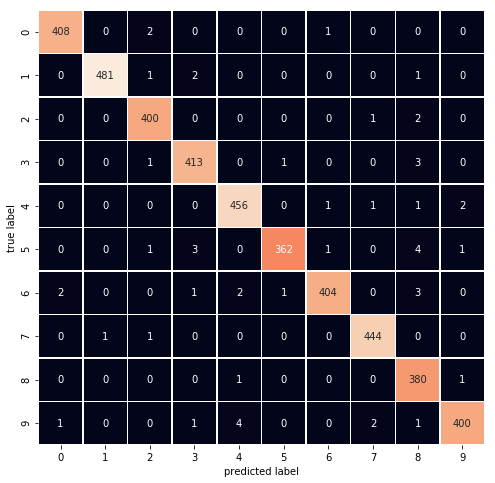

In [38]:
pred_val_cnn_2 = model_cnn_2.predict_classes(val_images)
plot_confusion_matrix(argmax(val_labels,-1), pred_val_cnn)
print(classification_report(argmax(val_labels,-1), pred_val_cnn))
acc_cnn = accuracy_score(argmax(val_labels,-1), pred_val_cnn)
print("Accuracy score : {}".format(acc_cnn))